---
<p align="left">
  <big>
    <b>
      <pre>
Júlia Aparecida Sousa de Oliveira    - RA: 769707 
Igor Teixeira Machado                - RA: 769708
Rafael Vinicius Polato Passador      - RA: 790036 
      </pre>
      <br>
      Disciplina: Aprendizado de Máquina 2
      <br>
      Professor: Prof. Dr. Diego Furtado Silva
      <br>
    </b>
  </big>
</p>


---

<h1 align="center"><b><big>Projeto de Implementação 01- Classificação Multirrótulo </big></b></h1>




#**1. Introdução**

<br>

Neste documento será apresentado o código utilizado para implementação do trabalho proposto. A partir da utilização de dados estruturados será realizada a classificação multirrótulo para comparação de três algoritmos que já têm implementação pronta, uma ou seja, uma avaliação experimental comparativa da robustez dos algoritmos escolhidos.

Dessa forma, para realização desta tarefa, escolheu-se cinco datasets diversos, explorados na seção (INSERIR AQUI). 

Assim sendo, serão apresentados os códigos, bem como as descrições das funções e resultados obtidos. Ademais, apresentam-se, também, as interpretações e documentações do problema. 

Link para a apresentação: (INSERIR)

Para resolução dessa problemática, abordamos 3 algoritimos de  classificação: Binary Relevance, Classifier Chains e Label Powerset. Além disso, combinando-os com 2 classificadores de rótulo para cada classificação multirrótulo, sendo eles Random Forest e Decision Tree.



## **1.1 Binary Relevance**


Nesse método de classificação multirrótulo um conjunto de classificadores binários é treinado, sendo um para cada classe. 
Cada classificador prevê a associação ou a não a uma classe. A união de todas as classes que foram previstas é tomada como saída multi-rótulo, ou seja, se houver *X* rótulos, o método de relevância binária cria *X* novos conjuntos de dados a partir dos dados, um para cada rótulo e treina classificadores binários, sim/não,  em cada novo conjunto de dados. 
Essa é uma abordagem é popular devido a simplicidade de implementação, mas não funciona bem quando há dependências entre os rótulos, podendo, também, causar desbalanceamento.

## **1.2 Classifier Chains**

Uma cadeia de classificadores binários C0, C1, . . . , Cn é construído, onde um classificador Ci usa as previsões de todo o classificador Cj , onde j < i. Dessa forma, o método, também chamado de cadeias classificadoras (CC), pode levar em conta as correlações de rótulos.
O número total de classificadores necessários para esta abordagem é igual ao número de classes. Ele combina a eficiência computacional do método de Relevância Binária, relacionando X classificadores binários para X categorias, enquanto ainda é capaz de levar em consideração as dependências do rótulo para classificação, passando informações de rótulo entre classificadores através do espaço de características.

## **1.3 Label Powerset**

Essa abordagem leva em consideração possíveis correlações entre rótulos de classe porque considera cada membro do conjunto de rótulos do conjunto de treinamento como um único rótulo, possuindo, em decorrência disso, a maior complexidade compultacional.
No entanto, quando o número de classes aumenta, o número de combinações de rótulos distintas pode crescer exponencialmente. Isso leva facilmente à explosão combinatória e, portanto, à inviabilidade computacional. Além disso, algumas combinações de rótulos terão muito poucos exemplos positivos.

## **1.4 Métricas Avaliativas**

Para avaliação dos resultados experimentais, as métricas avaliativas utilizadas foram: *Accuracy Score*, *Hamming Loss Score*, *Precision Score* e *Recall*.

Na classificação multirótulo, a função *accuracy_score* calcula a precisão do subconjunto: o conjunto de rótulos previsto para uma amostra deve corresponder exatamente ao conjunto de rótulos correspondente em y_true.

Paralelamenete, a perda de Hamming é a fração de rótulos que são previstos incorretamente.

Outrossim, a precisão é a razão $\frac{tp}{(tp + fp)}$ , em que *tp* é o número de verdadeiros positivos e *fp* o número de falsos positivos. A precisão é intuitivamente a capacidade do classificador não rotular como positiva uma amostra que é negativa.

Por fim, o recall é a razão $\frac{tp}{(tp + fn)}$ , em que *tp* é o número de verdadeiros positivos e *fn* o número de falsos negativos. O recall é intuitivamente a habilidade do classificador em encontrar todas as amostras positivas.



# **2. Imports das Bibliotecas Utilizadas**



In [1]:
!pip install scikit-multilearn

     |████████████████████████████████| 89 kB 3.2 MB/s 


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import nltk
import scipy


In [3]:
from sklearn.ensemble import RandomForestClassifier
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN
from sklearn.metrics import accuracy_score
from scipy.io import arff
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import precision_score

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **3. Yeast Dataset**
Este conjunto de dados contém expressões de micro-arrays, uma ferramenta laboratorial utilizada para detectar expressão de milhares de genes simultaneamente, e perfis filogenéticos para 2417 genes de levedura. Cada gene é anotado com um subconjunto de 14 categorias funcionais (por exemplo, metabolismo, energia, etc.) do nível superior do catálogo funcional.

### **Análise do Dataset**

In [5]:
data_yeast, meta_yeast = scipy.io.arff.loadarff('yeast-train.arff')
df_yeast = pd.DataFrame(data_yeast)
X_yeast_train = df_yeast

In [6]:
data_yeast_test, meta__yeast_test = scipy.io.arff.loadarff('yeast-test.arff')
df_yeast_test = pd.DataFrame(data_yeast_test)
X_yeast_test = df_yeast_test

Como podemos observar, os **Att's** represetam os atributos (variáveis independentes) e as **Class** representam as variáveis alvo para classificação. Dessa forma, o valor binário 1 representa que o gene pertence àquela classe, enquanto o valor 0 o oposto. 

In [7]:
df_yeast.head()

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,0.093700,0.139771,0.062774,0.007698,0.083873,-0.119156,0.073305,0.005510,0.027523,0.043477,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
1,-0.022711,-0.050504,-0.035691,-0.065434,-0.084316,-0.378560,0.038212,0.085770,0.182613,-0.055544,...,b'0',b'0',b'1',b'1',b'0',b'0',b'0',b'1',b'1',b'0'
2,-0.090407,0.021198,0.208712,0.102752,0.119315,0.041729,-0.021728,0.019603,-0.063853,-0.053756,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'1',b'0'
3,-0.085235,0.009540,-0.013228,0.094063,-0.013592,-0.030719,-0.116062,-0.131674,-0.165448,-0.123053,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'1',b'1'
4,-0.088765,-0.026743,0.002075,-0.043819,-0.005465,0.004306,-0.055865,-0.071484,-0.159025,-0.111348,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'


Transformando valores binários em inteiros e selecionando as categorias para classificação



In [8]:
df_yeast.replace([b'0', b'1'], [0, 1], inplace=True)


In [9]:
df_categories_yeast = df_yeast.iloc[:,-14:]
df_categories_yeast.head()

,Class1,Class2,Class3,Class4,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,1,0,0,0,1,1,0
2,0,1,1,0,0,0,0,0,0,0,0,1,1,0
3,0,0,1,1,0,0,0,0,0,0,0,1,1,1
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


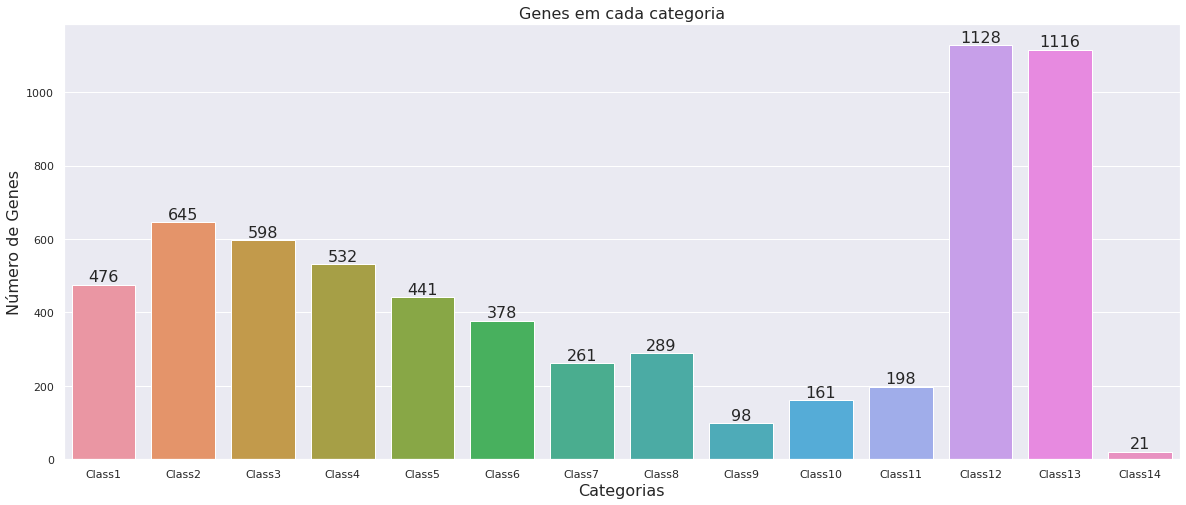

In [10]:
categories_yeast = list(df_categories_yeast.columns.values)
sns.set(font_scale = 1)
plt.figure(figsize=(20,8))
ax = sns.barplot(categories_yeast, df_categories_yeast.sum().values)
plt.title("Genes em cada categoria", fontsize=16)
plt.ylabel('Número de Genes', fontsize=16)
plt.xlabel('Categorias', fontsize=16)

rects = ax.patches
labels = df_categories_yeast.sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', fontsize=16)
plt.show()

In [11]:
labels_yeast = list(df_categories_yeast.columns.values)
labels_count_yeast = df_categories_yeast[labels_yeast].sum().values
labels_count_yeast


array([ 476,  645,  598,  532,  441,  378,  261,  289,   98,  161,  198,
       1128, 1116,   21])

In [12]:
genes_count_yeast = df_categories_yeast[labels_yeast].sum(axis=1)
genes_count_yeast


0       2
1       4
2       4
3       5
4       2
       ..
1495    2
1496    4
1497    5
1498    2
1499    4
Length: 1500, dtype: int64

In [13]:
multilabel_counts_yeast = (genes_count_yeast.value_counts())

indexes_yeast = [str(i) + ' label' for i in multilabel_counts_yeast.index.sort_values()]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


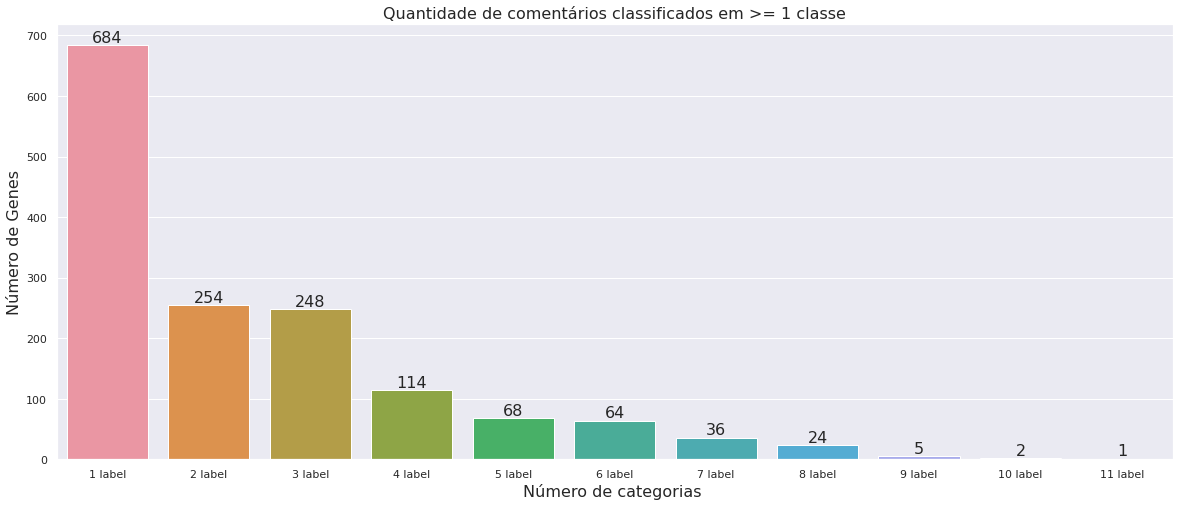

In [14]:
sns.set(font_scale = 1)
plt.figure(figsize=(20,8))
ax = sns.barplot(indexes_yeast, multilabel_counts_yeast.values)
plt.title("Quantidade de comentários classificados em >= 1 classe", fontsize=16)
plt.ylabel('Número de Genes', fontsize=16)
plt.xlabel('Número de categorias ', fontsize=16)

rects = ax.patches
labels = multilabel_counts_yeast
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', fontsize=16)
plt.show()

### **Treinamento**

In [15]:
X_yeast_train

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,0.093700,0.139771,0.062774,0.007698,0.083873,-0.119156,0.073305,0.005510,0.027523,0.043477,...,0,0,0,0,0,0,0,0,0,0
1,-0.022711,-0.050504,-0.035691,-0.065434,-0.084316,-0.378560,0.038212,0.085770,0.182613,-0.055544,...,0,0,1,1,0,0,0,1,1,0
2,-0.090407,0.021198,0.208712,0.102752,0.119315,0.041729,-0.021728,0.019603,-0.063853,-0.053756,...,0,0,0,0,0,0,0,1,1,0
3,-0.085235,0.009540,-0.013228,0.094063,-0.013592,-0.030719,-0.116062,-0.131674,-0.165448,-0.123053,...,0,0,0,0,0,0,0,1,1,1
4,-0.088765,-0.026743,0.002075,-0.043819,-0.005465,0.004306,-0.055865,-0.071484,-0.159025,-0.111348,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-0.119784,0.001259,-0.123645,-0.015513,-0.059683,0.091032,-0.043302,0.229219,-0.071498,0.182709,...,0,0,0,0,0,0,0,0,0,0
1496,0.085327,0.058590,0.085268,-0.020897,0.068972,0.030125,0.078056,0.011346,0.052618,0.066093,...,0,0,0,0,0,0,0,1,1,0
1497,0.082526,-0.095571,-0.022019,-0.046793,-0.038360,0.041084,0.056509,0.011749,-0.029657,-0.012198,...,0,1,1,1,0,0,0,1,1,0
1498,-0.130830,0.008868,-0.009457,-0.058930,-0.041224,0.042269,0.117717,0.037388,-0.085563,0.136649,...,0,0,0,0,0,0,0,1,1,0


Transformando valores binários em inteiros e selecionando as categorias para classificação

In [16]:
y_yeast_train = X_yeast_train.iloc[:,-14:]
X_yeast_train.drop(columns=list(y_yeast_train.columns), inplace=True)

In [17]:
y_yeast_test = X_yeast_test.iloc[:,-14:]
X_yeast_test.drop(columns=list(y_yeast_test.columns), inplace=True)

In [18]:
y_yeast_train.replace([b'0', b'1'], [0, 1], inplace=True)
y_yeast_test.replace([b'0', b'1'], [0, 1], inplace=True)

In [19]:
y_yeast_train

,Class1,Class2,Class3,Class4,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,1,0,0,0,1,1,0
2,0,1,1,0,0,0,0,0,0,0,0,1,1,0
3,0,0,1,1,0,0,0,0,0,0,0,1,1,1
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1496,1,1,0,0,0,0,0,0,0,0,0,1,1,0
1497,0,0,0,0,0,1,1,1,0,0,0,1,1,0
1498,0,0,0,0,0,0,0,0,0,0,0,1,1,0


#### **Binary Relevance**

In [20]:
br = BinaryRelevance(RandomForestClassifier())
br.fit(X_yeast_train, y_yeast_train)

pred = br.predict(X_yeast_test)

accuracy_score(y_yeast_test, pred)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

0.16575790621592149

In [21]:
hamming_loss(y_yeast_test, pred)

0.19379965726748716

In [22]:
recall_score(y_yeast_test, pred, average='macro')

0.3123092471858558

In [23]:
precision_score(y_yeast_test, pred, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6645859481247732

In [24]:
br = BinaryRelevance(DecisionTreeClassifier())
br.fit(X_yeast_train, y_yeast_train)

preddecision = br.predict(X_yeast_test)

accuracy_score(y_yeast_test, preddecision)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

0.05016357688113413

In [25]:
hamming_loss(y_yeast_test, preddecision)

0.2812743417977878

In [26]:
recall_score(y_yeast_test, preddecision, average='macro')

0.38834600696565297

In [27]:
precision_score(y_yeast_test, preddecision, average='macro')

0.3941634638403915

#### **Classifier Chains**

In [28]:
cc = ClassifierChain(RandomForestClassifier())

cc.fit(X_yeast_train, y_yeast_train)

pred_yeast2 = cc.predict(X_yeast_test)


accuracy_score(y_yeast_test, pred_yeast2)

0.21810250817884405

In [29]:
hamming_loss(y_yeast_test,pred_yeast2)

0.19481227605546036

In [30]:
recall_score(y_yeast_test, pred_yeast2, average='macro')

0.3301290457961275

In [31]:
precision_score(y_yeast_test, pred_yeast2, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5787023152166084

In [32]:
cc = ClassifierChain(DecisionTreeClassifier())

cc.fit(X_yeast_train, y_yeast_train)

pred_yeastdecision2 = cc.predict(X_yeast_test)


accuracy_score(y_yeast_test,pred_yeastdecision2)

0.128680479825518

In [33]:
hamming_loss(y_yeast_test,pred_yeastdecision2)

0.2817417043153139

In [34]:
recall_score(y_yeast_test, pred_yeastdecision2, average='macro')

0.3867346187190791

In [35]:
precision_score(y_yeast_test, pred_yeastdecision2, average='macro')

0.3784931397542752

#### **Label Powerset**

In [36]:
lp = LabelPowerset(RandomForestClassifier())

lp.fit(X_yeast_train, y_yeast_train)

pred_yeast3 = lp.predict(X_yeast_test)


accuracy_score(y_yeast_test, pred_yeast3)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.27153762268266085

In [37]:
hamming_loss(y_yeast_test, pred_yeast3)

0.20735317027574388

In [38]:
recall_score(y_yeast_test, pred_yeast3, average='macro')

0.39549455251397336

In [39]:
precision_score(y_yeast_test, pred_yeast3, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5392383862364711

In [40]:
lp = LabelPowerset(DecisionTreeClassifier())

lp.fit(X_yeast_train, y_yeast_train)

pred_yeastdecision3 = lp.predict(X_yeast_test)


accuracy_score(y_yeast_test,pred_yeastdecision3)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.12758996728462377

In [41]:
hamming_loss(y_yeast_test, pred_yeastdecision3)

0.2852469231967596

In [42]:
recall_score(y_yeast_test, pred_yeastdecision3, average='macro')

0.37692254160012195

In [43]:
precision_score(y_yeast_test, pred_yeastdecision3, average='macro')

0.37907249370815094

## **Resultados Finais**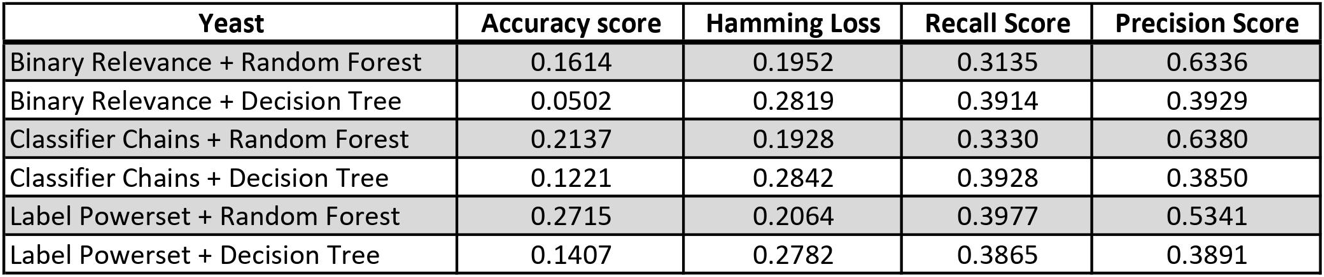

# **4. Emotions Dataset**

### **Análise do Dataset**

É um pequeno conjunto de dados para classificar a música em emoções que ela evoca de acordo com o modelo de humor de Tellegen-Watson-Clark: surpreso-surpreso, feliz-satisfeito, relaxante-calmo, quieto-ainda, triste-solitário e irritado-agressivo. É composto por 593 músicas com 6 rótulos.

In [44]:
data_emotions, meta_emotions = scipy.io.arff.loadarff('emotions-train.arff')
df_emotions = pd.DataFrame(data_emotions)
X_emotions_train = df_emotions

In [45]:
df_emotions.head()

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,...,2.0,0.245457,0.105065,0.405399,b'0',b'1',b'1',b'0',b'0',b'0'
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,0.458514,0.041426,...,2.0,0.343547,0.276366,0.710924,b'1',b'0',b'0',b'0',b'0',b'1'
2,0.110545,0.273567,0.084410,-65.235325,2.794964,0.639047,1.281297,0.757896,0.489412,0.627636,...,3.0,0.188693,0.045941,0.457372,b'0',b'1',b'0',b'0',b'0',b'1'
3,0.042481,0.199281,0.093447,-80.305152,5.824409,0.648848,1.754870,1.495532,0.739909,0.809644,...,2.0,0.102839,0.241934,0.351009,b'0',b'0',b'1',b'0',b'0',b'0'
4,0.074550,0.140880,0.079789,-93.697749,5.543229,1.064262,0.899152,0.890336,0.702328,0.490685,...,2.0,0.195196,0.310801,0.683817,b'0',b'0',b'0',b'1',b'0',b'0'


In [46]:
data_emotions_test, meta__emotions_test = scipy.io.arff.loadarff('emotions-test.arff')
df_emotions_test = pd.DataFrame(data_emotions_test)
X_emotions_test = df_emotions_test

Transformando valores binários em inteiros e selecionando as categorias para classificação

In [47]:
df_emotions.replace([b'0', b'1'], [0, 1], inplace=True)


In [48]:
df_categories_emotions = df_emotions.iloc[:,-6:]
df_categories_emotions.head()

,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0,1,1,0,0,0
1,1,0,0,0,0,1
2,0,1,0,0,0,1
3,0,0,1,0,0,0
4,0,0,0,1,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


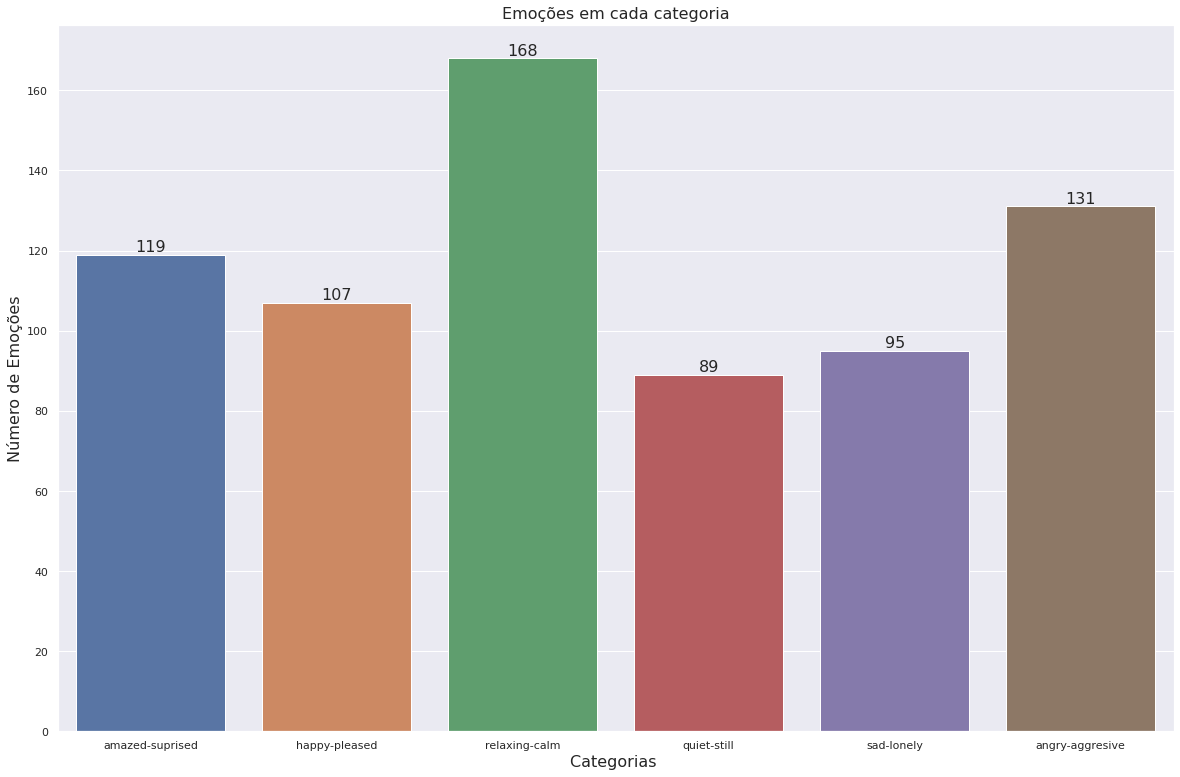

In [49]:
categories_emotions = list(df_categories_emotions.columns.values)
sns.set(font_scale = 1)
plt.figure(figsize=(20,13))
ax= sns.barplot(categories_emotions, df_categories_emotions.sum().values)
plt.title("Emoções em cada categoria", fontsize=16)
plt.ylabel('Número de Emoções', fontsize=16)
plt.xlabel('Categorias ', fontsize=16)
#adding the text labels
rects = ax.patches
labels = df_categories_emotions.sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', fontsize=16)
plt.show()

In [50]:
labels_emotions = list(df_categories_emotions.columns.values)
labels_count_emotions = df_categories_emotions[labels_emotions].sum().values
labels_count_emotions


array([119, 107, 168,  89,  95, 131])

In [51]:
genes_count_emotions = df_categories_emotions[labels_emotions].sum(axis=1)
genes_count_emotions


0      2
1      2
2      2
3      1
4      1
      ..
386    1
387    2
388    2
389    2
390    2
Length: 391, dtype: int64

In [52]:
multilabel_counts_emotions = (genes_count_emotions.value_counts())

indexes = [str(i) + ' label' for i in multilabel_counts_emotions.index.sort_values()]

In [53]:
multilabel_counts_emotions

2    202
1    131
3     58
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


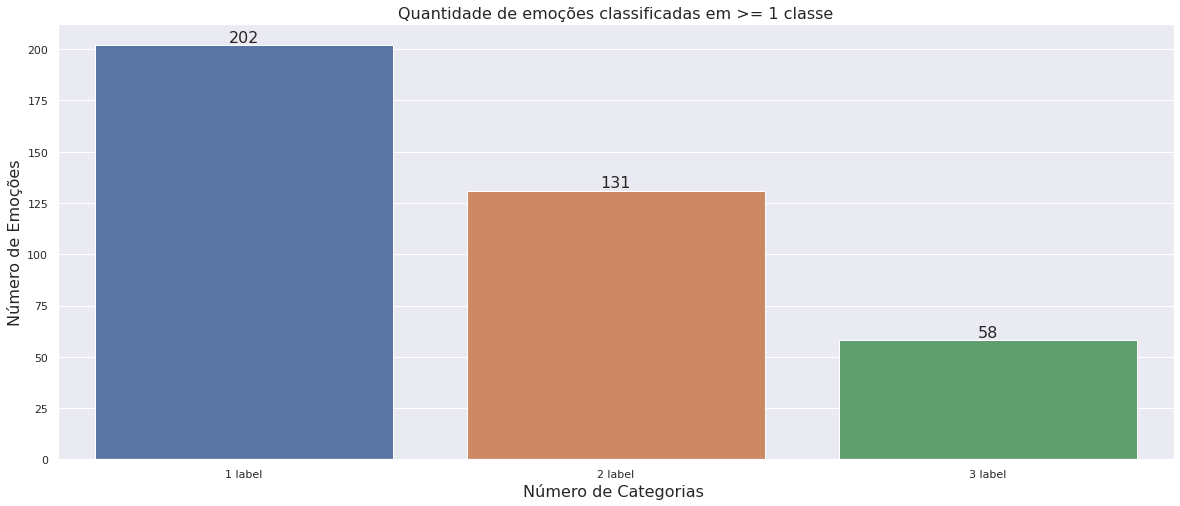

In [54]:
sns.set(font_scale = 1)
plt.figure(figsize=(20,8))
ax = sns.barplot(indexes, multilabel_counts_emotions.values)
plt.title("Quantidade de emoções classificadas em >= 1 classe", fontsize=16)
plt.ylabel('Número de Emoções', fontsize=16)
plt.xlabel('Número de Categorias ', fontsize=16)
#adding the text labels
rects = ax.patches
labels = multilabel_counts_emotions
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', fontsize=16)
plt.show()

### **Treinamento**

In [55]:
X_emotions_train

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,...,2.0,0.245457,0.105065,0.405399,0,1,1,0,0,0
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,0.458514,0.041426,...,2.0,0.343547,0.276366,0.710924,1,0,0,0,0,1
2,0.110545,0.273567,0.084410,-65.235325,2.794964,0.639047,1.281297,0.757896,0.489412,0.627636,...,3.0,0.188693,0.045941,0.457372,0,1,0,0,0,1
3,0.042481,0.199281,0.093447,-80.305152,5.824409,0.648848,1.754870,1.495532,0.739909,0.809644,...,2.0,0.102839,0.241934,0.351009,0,0,1,0,0,0
4,0.074550,0.140880,0.079789,-93.697749,5.543229,1.064262,0.899152,0.890336,0.702328,0.490685,...,2.0,0.195196,0.310801,0.683817,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,0.065002,0.178495,0.079270,-56.297652,2.849084,0.898520,1.224303,0.215222,0.371932,0.275251,...,2.0,0.044070,0.037909,0.123335,0,0,0,0,0,1
387,0.016210,0.513427,0.094665,-68.799098,4.622023,1.375783,1.340068,0.957742,0.872255,0.585099,...,2.0,0.270276,0.438492,0.935467,1,0,0,0,0,1
388,0.042903,0.089283,0.080263,-71.474821,5.128890,0.529289,2.667867,0.155866,2.358098,-0.209229,...,2.0,0.366192,0.289227,0.661680,0,1,1,0,0,0
389,0.038987,0.059570,0.082053,-81.361592,5.949950,2.090330,2.507652,1.684529,1.025200,0.343319,...,2.0,0.581526,0.047156,0.774458,0,0,0,1,1,0


In [56]:
X_emotions_test

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0.036299,0.064986,0.082104,-72.710462,7.920220,0.134279,2.546373,0.671063,1.589821,0.576485,...,2.0,0.095982,0.520006,0.677943,b'0',b'0',b'1',b'1',b'1',b'0'
1,0.161218,0.467820,0.096983,-71.298043,1.176349,1.871744,1.097346,0.641059,0.372797,0.991050,...,2.0,0.752210,0.576382,1.477141,b'1',b'0',b'0',b'0',b'0',b'1'
2,0.115987,0.336879,0.079068,-64.570939,2.339044,0.714859,1.792451,0.611347,0.287022,0.772846,...,2.0,0.488375,0.004603,1.147727,b'0',b'0',b'0',b'0',b'1',b'0'
3,0.086016,0.141845,0.081554,-81.141092,6.714252,-1.338896,1.326248,0.340032,1.290664,0.337209,...,2.0,0.430059,0.102757,1.276632,b'0',b'1',b'1',b'0',b'0',b'0'
4,0.063232,0.140621,0.082097,-66.596131,5.594724,0.350716,1.023655,0.439544,0.855564,0.414784,...,2.0,1.788567,0.032760,3.076057,b'0',b'0',b'0',b'0',b'1',b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,0.027142,0.047551,0.072043,-79.881347,8.119313,1.927310,1.696017,0.397888,0.857559,0.302742,...,2.0,0.261742,0.002657,1.149211,b'0',b'0',b'1',b'1',b'1',b'0'
198,0.094829,0.204498,0.082824,-61.364436,2.966229,0.627740,1.440352,0.856243,1.110282,0.394450,...,2.0,0.282122,0.052218,0.335371,b'1',b'0',b'0',b'0',b'1',b'1'
199,0.035169,0.065403,0.075227,-81.750533,10.311701,0.092224,0.818851,1.569606,1.831909,0.057216,...,2.0,0.184313,0.247136,0.476993,b'0',b'0',b'1',b'1',b'1',b'0'
200,0.054276,0.238158,0.095935,-71.009724,3.181340,1.547197,2.407780,0.618838,0.997950,0.825143,...,2.0,0.547126,0.183494,1.255820,b'0',b'1',b'1',b'0',b'0',b'0'


Transformando valores binários em inteiros e selecionando as categorias para classificação

In [57]:
y_emotions_train = X_emotions_train.iloc[:,-6:]
X_emotions_train.drop(columns=list(y_emotions_train.columns), inplace=True)

In [58]:
y_emotions_test = X_emotions_test.iloc[:,-6:]
X_emotions_test.drop(columns=list(y_emotions_test.columns), inplace=True)

In [59]:
y_emotions_train.replace([b'0', b'1'], [0, 1], inplace=True)
y_emotions_test.replace([b'0', b'1'], [0, 1], inplace=True)

In [60]:
y_emotions_train

,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0,1,1,0,0,0
1,1,0,0,0,0,1
2,0,1,0,0,0,1
3,0,0,1,0,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
386,0,0,0,0,0,1
387,1,0,0,0,0,1
388,0,1,1,0,0,0
389,0,0,0,1,1,0


#### **Binary Relevance**

In [61]:
br = BinaryRelevance(RandomForestClassifier())

br.fit(X_emotions_train, y_emotions_train)

pred_emotions = br.predict(X_emotions_test)

accuracy_score(y_emotions_test, pred_emotions)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

0.27722772277227725

In [62]:
hamming_loss(y_emotions_test, pred_emotions)


0.19306930693069307

In [63]:
recall_score(y_emotions_test, pred_emotions, average='macro')


0.5662230310474013

In [64]:

precision_score(y_emotions_test, pred_emotions, average='macro')

0.7989285795945148

In [65]:
#accuracy_emotions = accuracy_score(y_emotions_test, pred_emotions)
#hamming_emotions = hamming_loss(y_emotions_test, pred)
#recall_emotions = recall_score(y_emotions_test, pred, average='macro')
#precision_emotions = precision_score(y_emotions_test, pred, average='macro')

#print("Accuracy: ", hamming_emotions)
#print("Hamming Loss: ", hamming_emotions)
#print("Recall: ", recall_emotions)
#print("Precision: ", precision_emotions)

In [66]:
br = BinaryRelevance(DecisionTreeClassifier())

br.fit(X_emotions_train, y_emotions_train)

pred_emotionsdecision = br.predict(X_emotions_test)


accuracy_score(y_emotions_test, pred_emotionsdecision)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

0.11386138613861387

In [67]:
hamming_loss(y_emotions_test, pred_emotionsdecision)


0.30445544554455445

In [68]:
recall_score(y_emotions_test, pred_emotionsdecision, average='macro')


0.5089773784827396

In [69]:

precision_score(y_emotions_test, pred_emotionsdecision, average='macro')

0.5364402157148352

#### **Classifier Chains**

In [70]:
cc = ClassifierChain(RandomForestClassifier())

cc.fit(X_emotions_train, y_emotions_train)

pred_emotions3 = cc.predict(X_emotions_test)


accuracy_score(y_emotions_test, pred_emotions3)

0.30198019801980197

In [71]:
hamming_loss(y_emotions_test, pred_emotions3)


0.19801980198019803

In [72]:
recall_score(y_emotions_test, pred_emotions3, average='macro')


0.5908414451219084

In [73]:

precision_score(y_emotions_test, pred_emotions3, average='macro')

0.7583898690807699

In [74]:
cc = ClassifierChain(DecisionTreeClassifier())

cc.fit(X_emotions_train, y_emotions_train)

pred_emotionsdecision3 = cc.predict(X_emotions_test)


accuracy_score(y_emotions_test, pred_emotionsdecision3)

0.18316831683168316

In [75]:
hamming_loss(y_emotions_test, pred_emotionsdecision3)


0.2747524752475248

In [76]:
recall_score(y_emotions_test, pred_emotionsdecision3, average='macro')


0.5502024740952065

In [77]:

precision_score(y_emotions_test, pred_emotionsdecision3, average='macro')

0.5967774873560286

#### **Label Powerset**

In [78]:
lp = LabelPowerset(RandomForestClassifier())

lp.fit(X_emotions_train, y_emotions_train)

pred_emotions4 = lp.predict(X_emotions_test)


accuracy_score(y_emotions_test, pred_emotions4)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.36633663366336633

In [79]:
hamming_loss(y_emotions_test, pred_emotions4)


0.2037953795379538

In [80]:
recall_score(y_emotions_test, pred_emotions4, average='macro')


0.7151819503292579

In [81]:

precision_score(y_emotions_test, pred_emotions4, average='macro')

0.6766260336371515

In [82]:
lp = LabelPowerset(DecisionTreeClassifier())

lp.fit(X_emotions_train, y_emotions_train)

pred_emotionsdecision4 = lp.predict(X_emotions_test)


accuracy_score(y_emotions_test, pred_emotionsdecision4)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.1782178217821782

In [83]:
hamming_loss(y_emotions_test, pred_emotionsdecision4)


0.29455445544554454

In [84]:
recall_score(y_emotions_test, pred_emotionsdecision4, average='macro')


0.5488201807565634

In [85]:

precision_score(y_emotions_test, pred_emotionsdecision4, average='macro')

0.561778039894429

## **Resultados Finais**

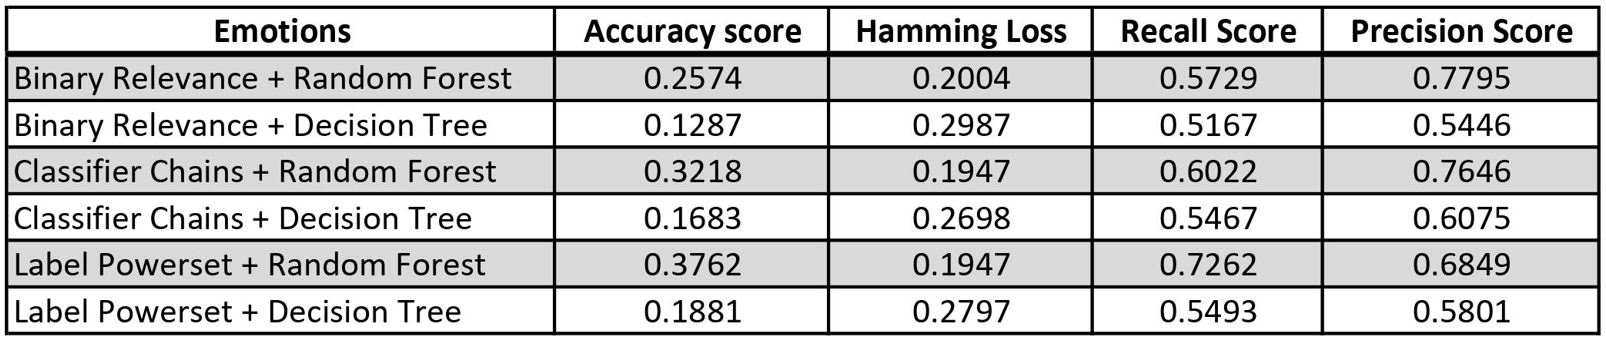

# **5. Genbase Dataset**

### **Análise do Dataset**

É um conjunto de dados para classificação de funções de proteínas. Cada instância é uma proteína e cada rótulo é uma classe de proteína. Este conjunto de dados é pequeno em comparação com o grande número de rótulos, possuindo 662 instâncias para serem analisadas com 1186 atributos nominais e 27 rótulos.

In [86]:
data_genbase, meta_genbase = scipy.io.arff.loadarff('genbase-train.arff')
df_genbase = pd.DataFrame(data_genbase)
X_genbase_train = df_genbase

In [87]:
df_genbase.head()

,protein,PS00010,PS00011,PS00012,PS00014,PS00017,PS00018,PS00019,PS00020,PS00021,...,PDOC00662,PDOC00018,PDOC50001,PDOC00014,PDOC00750,PDOC50196,PDOC50199,PDOC00660,PDOC00653,PDOC00030
0,b'Q9PQS9',b'NO',b'NO',b'NO',b'NO',b'NO',b'NO',b'NO',b'NO',b'NO',...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
1,b'P22011',b'NO',b'NO',b'NO',b'NO',b'NO',b'NO',b'NO',b'NO',b'NO',...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
2,b'P79374',b'NO',b'NO',b'NO',b'NO',b'NO',b'NO',b'NO',b'NO',b'NO',...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
3,b'P09194',b'NO',b'NO',b'NO',b'NO',b'NO',b'NO',b'NO',b'NO',b'NO',...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
4,b'P05811',b'NO',b'NO',b'NO',b'NO',b'NO',b'NO',b'NO',b'NO',b'NO',...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'


In [88]:
data_genbase_test, meta__genbase_test = scipy.io.arff.loadarff('genbase-test.arff')
df_genbase_test = pd.DataFrame(data_genbase_test)
X_genbase_test = df_genbase_test

Transformando valores binários em inteiros e selecionando as categorias para classificação

In [89]:
df_genbase.replace([b'0', b'1'], [0, 1], inplace=True)

In [90]:
df_categories_genbase = df_genbase.iloc[:,-27:]
df_categories_genbase.head()

,PDOC00154,PDOC00343,PDOC00271,PDOC00064,PDOC00791,PDOC00380,PDOC50007,PDOC00224,PDOC00100,PDOC00670,...,PDOC00662,PDOC00018,PDOC50001,PDOC00014,PDOC00750,PDOC50196,PDOC50199,PDOC00660,PDOC00653,PDOC00030
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


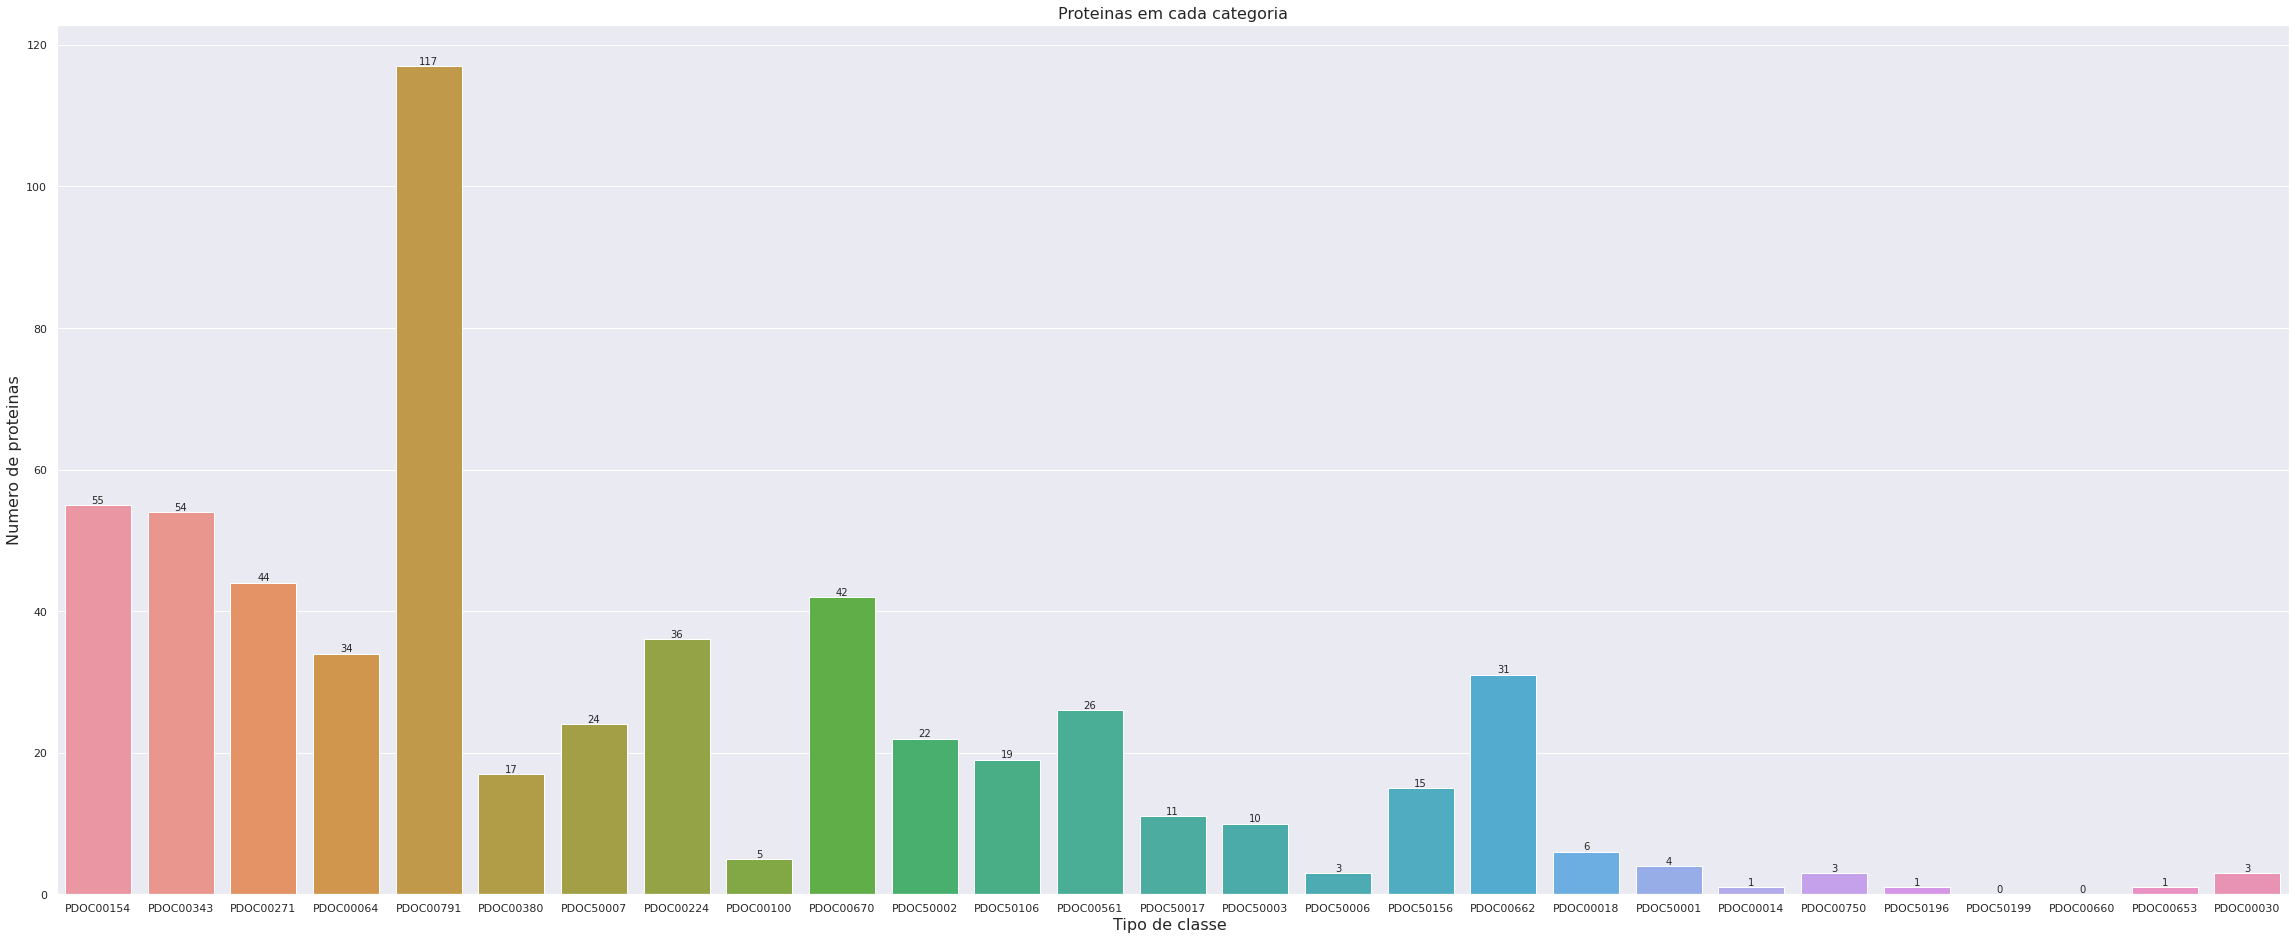

In [91]:
categories_genbase = list(df_categories_genbase.columns.values)
sns.set(font_scale = 1)
plt.figure(figsize=(40,16))
ax = sns.barplot(categories_genbase, df_categories_genbase.sum().values)
plt.title("Proteinas em cada categoria", fontsize=16)
plt.ylabel('Numero de proteinas', fontsize=16)
plt.xlabel('Tipo de classe ', fontsize=16)
#adding the text labels
rects = ax.patches
labels = df_categories_genbase.sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', fontsize=10)
plt.show()

In [92]:
labels_genbase = list(df_categories_genbase.columns.values)
labels_count_genbase = df_categories_genbase[labels_genbase].sum().values
labels_count_genbase


array([ 55,  54,  44,  34, 117,  17,  24,  36,   5,  42,  22,  19,  26,
        11,  10,   3,  15,  31,   6,   4,   1,   3,   1,   0,   0,   1,
         3])

In [93]:
protein_count_genbase = df_categories_genbase[labels_genbase].sum(axis=1)
protein_count_genbase


0      1
1      1
2      1
3      1
4      1
      ..
458    1
459    1
460    1
461    2
462    1
Length: 463, dtype: int64

In [94]:
multilabel_counts_genbase = (protein_count_genbase.value_counts())

indexes = [str(i) + ' label' for i in multilabel_counts_genbase.index.sort_values()]

In [95]:
multilabel_counts_genbase

1    386
2     48
3     20
4      5
6      2
5      2
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


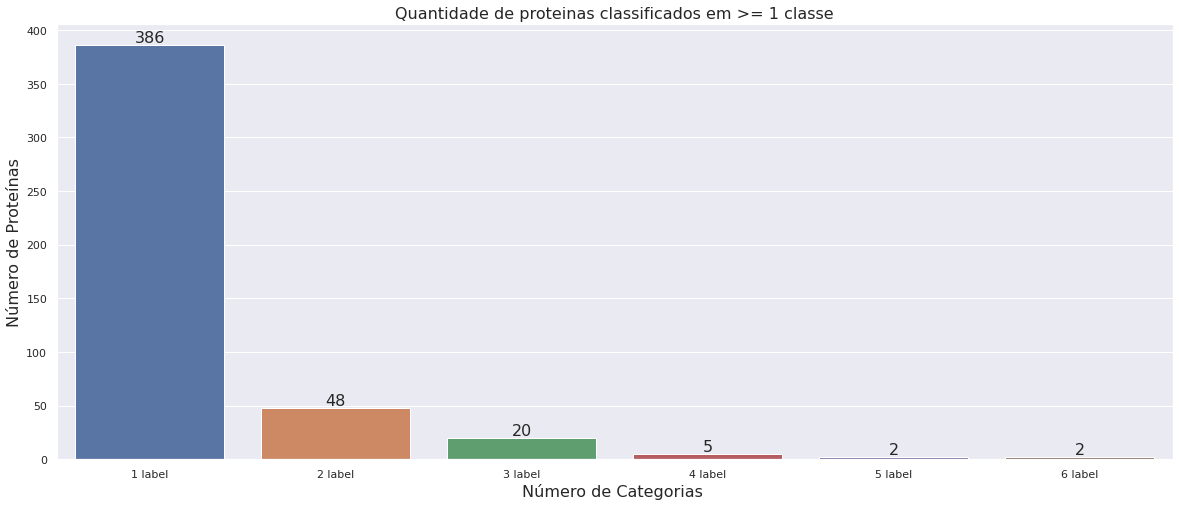

In [96]:
sns.set(font_scale = 1)
plt.figure(figsize=(20,8))
ax = sns.barplot(indexes, multilabel_counts_genbase.values)
plt.title("Quantidade de proteinas classificados em >= 1 classe", fontsize=16)
plt.ylabel('Número de Proteínas', fontsize=16)
plt.xlabel('Número de Categorias ', fontsize=16)
#adding the text labels
rects = ax.patches
labels = multilabel_counts_genbase
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', fontsize=16)
plt.show()

### **Treinamento**

In [97]:
for i in X_genbase_train.columns:
    print('Coluna {}: treino {} / teste {}'.format(i, X_genbase_train[i].unique(), X_genbase_test[i].unique()))

Coluna protein: treino [b'Q9PQS9' b'P22011' b'P79374' b'P09194' b'P05811' b'Q90497' b'P46874'
 b'P02498' b'Q10283' b'O74164' b'P27512' b'P19101' b'P34328' b'P52015'
 b'P55861' b'Q12756' b'P35978' b'P52016' b'P48021' b'P32971' b'P54578'
 b'O70589' b'P23928' b'P29117' b'P35545' b'O15066' b'Q91637' b'O26662'
 b'Q00583' b'P13853' b'P22979' b'P34024' b'P04120' b'O77764' b'P51743'
 b'O43093' b'P55852' b'O00060' b'P51432' b'Q58371' b'P19243' b'P40977'
 b'Q91876' b'Q06600' b'P29210' b'P08618' b'P18105' b'P48019' b'P13117'
 b'P08487' b'O34328' b'Q39613' b'P31170' b'P35137' b'P04793' b'P21074'
 b'P05477' b'P16599' b'P26445' b'P14832' b'P47103' b'P47353' b'P48020'
 b'O75888' b'P36941' b'P17119' b'P04838' b'P97310' b'P05092' b'P02510'
 b'Q95661' b'P02500' b'P21671' b'P02513' b'P02512' b'P97311' b'P27397'
 b'Q60575' b'P46872' b'P28908' b'O77510' b'Q9KXS0' b'P46865' b'Q07011'
 b'P46730' b'P70917' b'Q58884' b'Q13368' b'Q39493' b'P33993' b'P06582'
 b'Q41651' b'Q93068' b'Q43704' b'P24623' b'O12988' b'P

Transformando valores binários em inteiros e selecionando as categorias para classificação.

Como a coluna 'protein' possuia apenas atributos nominais e únicos para cada proteína, ela não acrescentava dados relevantes para classificação e foi deletada

In [98]:
X_genbase_train.replace([b'NO',b'YES',b'0',b'1'],[0,1,0,1], inplace=True) 
X_genbase_test.replace([b'NO',b'YES',b'0',b'1'],[0,1,0,1], inplace=True)

y_genbase_train = X_genbase_train.iloc[:,-27:]
X_genbase_train.drop(columns=list(y_genbase_train.columns), inplace=True)
X_genbase_train.drop(columns=['protein'], inplace=True)

y_genbase_test = X_genbase_test.iloc[:,-27:]
X_genbase_test.drop(columns=list(y_genbase_test.columns), inplace=True)
X_genbase_test.drop(columns=['protein'], inplace=True)

#### **Binary Relevance**

In [99]:
br = BinaryRelevance(RandomForestClassifier())

br.fit(X_genbase_train, y_genbase_train)

pred_genbase = br.predict(X_genbase_test)


accuracy_score(y_genbase_test, pred_genbase)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

0.9748743718592965

In [100]:
hamming_loss(y_genbase_test, pred_genbase)


0.0011166945840312675

In [101]:
recall_score(y_genbase_test, pred_genbase, average='macro')


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7222222222222222

In [102]:

precision_score(y_genbase_test ,pred_genbase, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7222222222222222

In [103]:
br = BinaryRelevance(DecisionTreeClassifier())

br.fit(X_genbase_train, y_genbase_train)

pred_genbase2decision = br.predict(X_genbase_test)


accuracy_score(y_genbase_test, pred_genbase2decision)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

0.9698492462311558

In [104]:
hamming_loss(y_genbase_test, pred_genbase2decision)


0.0011166945840312675

In [105]:
recall_score(y_genbase_test, pred_genbase2decision, average='macro')


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8148148148148148

In [106]:
precision_score(y_genbase_test, pred_genbase2decision, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7956228956228957

#### **Classifier Chains**

In [107]:
cc = ClassifierChain(RandomForestClassifier())

cc.fit(X_genbase_train, y_genbase_train)

pred_genbase3 = cc.predict(X_genbase_test)


accuracy_score(y_genbase_test, pred_genbase3)

0.9798994974874372

In [108]:
hamming_loss(y_genbase_test, pred_genbase3)


0.0009305788200260562

In [109]:
recall_score(y_genbase_test, pred_genbase3, average='macro')


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7407407407407407

In [110]:
precision_score(y_genbase_test, pred_genbase3, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.728395061728395

In [111]:
cc = ClassifierChain(DecisionTreeClassifier())

cc.fit(X_genbase_train, y_genbase_train)

pred_genbasedecision3 = cc.predict(X_genbase_test)


accuracy_score(y_genbase_test, pred_genbasedecision3)

0.9698492462311558

In [112]:
hamming_loss(y_genbase_test, pred_genbasedecision3)


0.0011166945840312675

In [113]:
recall_score(y_genbase_test, pred_genbasedecision3, average='macro')


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8148148148148148

In [114]:
precision_score(y_genbase_test, pred_genbasedecision3, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7956228956228957

#### **Label Powerset**

In [115]:
lp = LabelPowerset(RandomForestClassifier())

lp.fit(X_genbase_train, y_genbase_train)

pred_genbase4 = lp.predict(X_genbase_test)


accuracy_score(y_genbase_test, pred_genbase4)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.9798994974874372

In [116]:
hamming_loss(y_genbase_test, pred_genbase4)


0.0009305788200260562

In [117]:
recall_score(y_genbase_test, pred_genbase4, average='macro')


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7407407407407407

In [118]:
precision_score(y_genbase_test, pred_genbase4, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.728395061728395

In [119]:
lp = LabelPowerset(DecisionTreeClassifier())

lp.fit(X_genbase_train, y_genbase_train)

pred_genbasedecision4 = lp.predict(X_genbase_test)


accuracy_score(y_genbase_test, pred_genbasedecision4)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.9748743718592965

In [120]:
hamming_loss(y_genbase_test, pred_genbasedecision4)


0.0011166945840312675

In [121]:
recall_score(y_genbase_test, pred_genbasedecision4, average='macro')


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.774074074074074

In [122]:
precision_score(y_genbase_test, pred_genbasedecision4, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7608024691358024

## **Resultados Finais**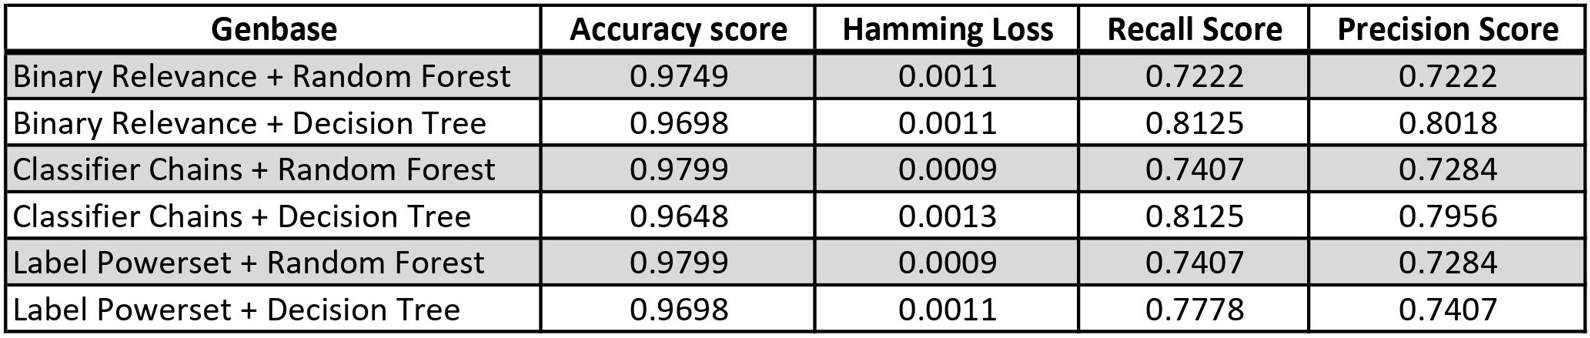

# **6. Flags Dataset**

### **Análise do Dataset**

Este conjunto de dados contém detalhes de alguns países e suas bandeiras, e o objetivo é prever qual a cor da bandeira do país a partir de atributos como formas geométricas, religião, idioma, entre outros. Possui 194 instâncias e 19 rótulos, com 9 nominais e 10 numéricos.

In [123]:
data_flags, meta_flags = scipy.io.arff.loadarff('flags-train.arff')
df_flags = pd.DataFrame(data_flags)
X_flags_train = df_flags

In [124]:
data_flags_test, meta__flags_test = scipy.io.arff.loadarff('flags-test.arff')
df_flags_test = pd.DataFrame(data_flags_test)
X_flags_test = df_flags_test

In [125]:
df_flags.head()

,landmass,zone,area,population,language,religion,bars,stripes,colours,circles,...,icon,animate,text,red,green,blue,yellow,white,black,orange
0,b'4',b'1',164.0,7.0,b'8',b'2',0.0,0.0,2.0,1.0,...,b'0',b'0',b'0',b'1',b'0',b'0',b'0',b'1',b'0',b'0'
1,b'4',b'4',111.0,1.0,b'10',b'5',0.0,11.0,3.0,0.0,...,b'0',b'0',b'0',b'1',b'0',b'1',b'0',b'1',b'0',b'0'
2,b'1',b'4',0.0,0.0,b'1',b'1',0.0,0.0,3.0,1.0,...,b'0',b'1',b'0',b'1',b'1',b'0',b'1',b'0',b'0',b'0'
3,b'1',b'4',109.0,8.0,b'2',b'0',3.0,0.0,2.0,0.0,...,b'0',b'0',b'0',b'0',b'0',b'1',b'0',b'1',b'0',b'0'
4,b'4',b'4',10.0,1.0,b'1',b'5',0.0,5.0,4.0,0.0,...,b'0',b'0',b'0',b'1',b'1',b'1',b'0',b'1',b'0',b'0'


In [126]:
df_flags.replace([b'0', b'1'], [0, 1], inplace=True)


In [127]:
df_categories_flags = df_flags.iloc[:,-7:]
df_categories_flags.head()

,red,green,blue,yellow,white,black,orange
0,1,0,0,0,1,0,0
1,1,0,1,0,1,0,0
2,1,1,0,1,0,0,0
3,0,0,1,0,1,0,0
4,1,1,1,0,1,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


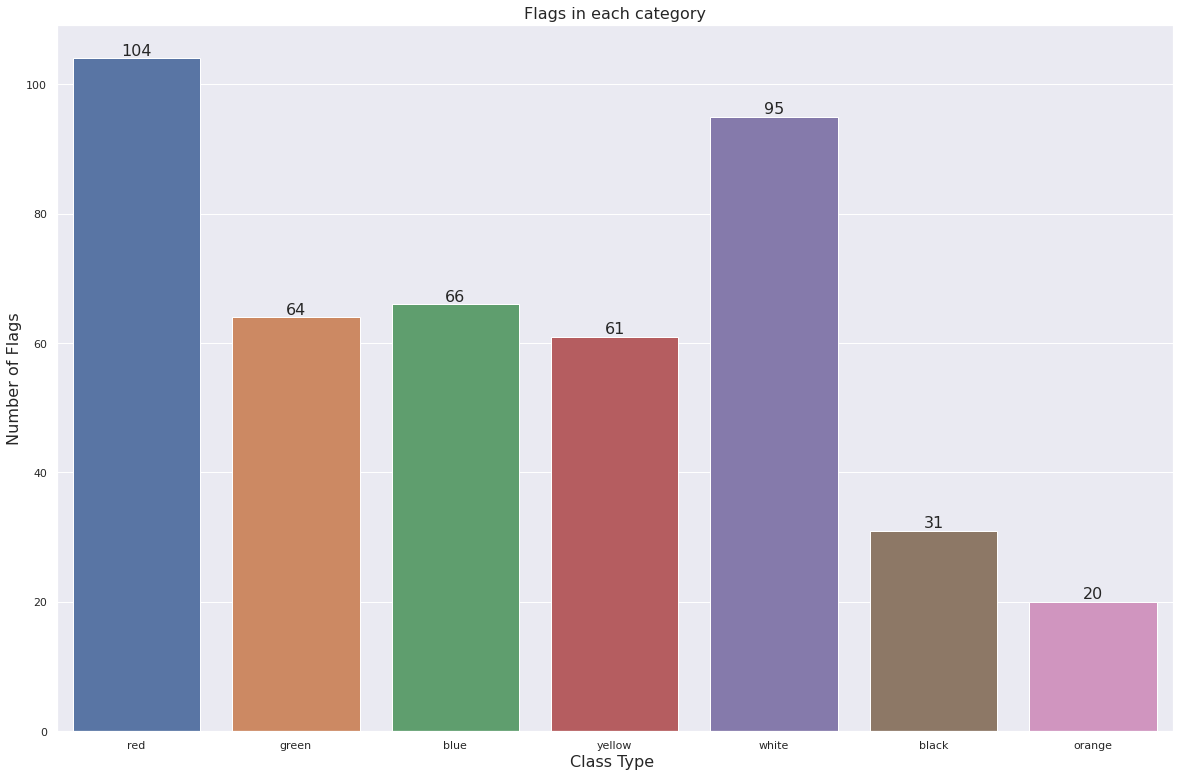

In [128]:
categories_flags = list(df_categories_flags.columns.values)
sns.set(font_scale = 1)
plt.figure(figsize=(20,13))
ax= sns.barplot(categories_flags, df_categories_flags.sum().values)
plt.title("Flags in each category", fontsize=16)
plt.ylabel('Number of Flags', fontsize=16)
plt.xlabel('Class Type ', fontsize=16)
#adding the text labels
rects = ax.patches
labels = df_categories_flags.sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', fontsize=16)
plt.show()

In [129]:
labels_flags = list(df_categories_flags.columns.values)
labels_count_flags = df_categories_flags[labels_flags].sum().values
labels_count_flags


array([104,  64,  66,  61,  95,  31,  20])

In [130]:
flags_count_colors = df_categories_flags[labels_flags].sum(axis=1)
flags_count_colors

0      2
1      3
2      3
3      2
4      4
      ..
124    4
125    5
126    3
127    5
128    3
Length: 129, dtype: int64

In [131]:
multilabel_counts_flags = (flags_count_colors.value_counts())

indexes = [str(i) + ' label' for i in multilabel_counts_flags.index.sort_values()]

In [132]:
multilabel_counts_flags

3    54
4    28
2    26
6    10
5     8
7     2
1     1
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


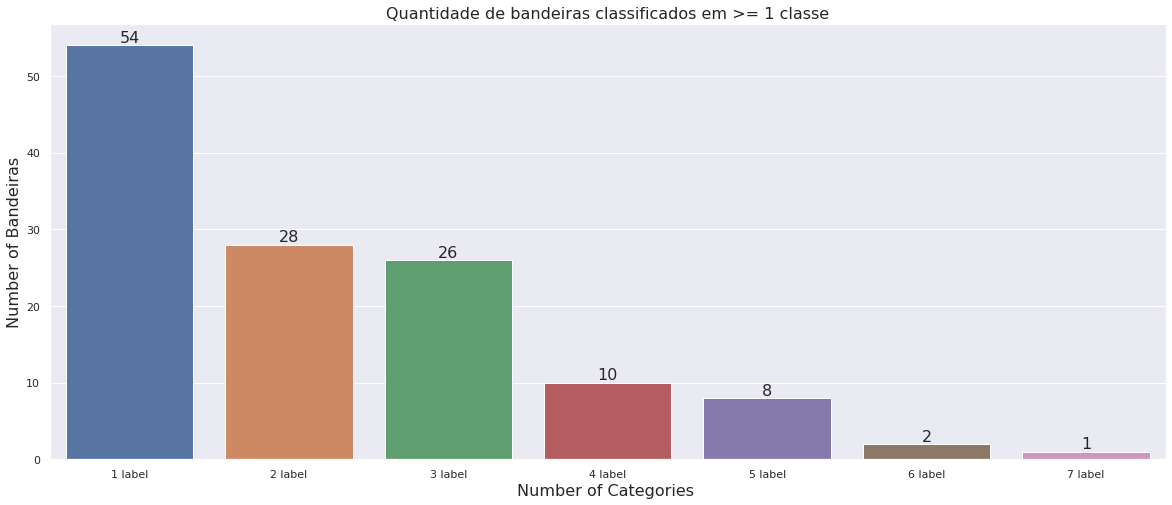

In [133]:
sns.set(font_scale = 1)
plt.figure(figsize=(20,8))
ax = sns.barplot(indexes, multilabel_counts_flags.values)
plt.title("Quantidade de bandeiras classificados em >= 1 classe", fontsize=16)
plt.ylabel('Number of Bandeiras', fontsize=16)
plt.xlabel('Number of Categories ', fontsize=16)
#adding the text labels
rects = ax.patches
labels = multilabel_counts_flags
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', fontsize=16)
plt.show()

### **Treinamento**

In [134]:
for i in X_flags_train.columns:
    print('Coluna {}: treino {} / teste {}'.format(i, X_flags_train[i].unique(), X_flags_test[i].unique()))

Coluna landmass: treino [b'4' 1 b'2' b'5' b'6' b'3'] / teste [b'4' b'2' b'6' b'5' b'1' b'3']
Coluna zone: treino [1 b'4' b'3' b'2'] / teste [b'1' b'3' b'4' b'2']
Coluna area: treino [1.6400e+02 1.1100e+02 0.0000e+00 1.0900e+02 1.0000e+01 2.1760e+03
 1.2000e+01 3.2680e+03 1.0310e+03 8.5120e+03 1.0000e+00 7.0000e+01
 1.9600e+02 3.3300e+02 1.7600e+03 3.0000e+00 1.9500e+02 2.8000e+01
 2.4900e+02 9.4500e+02 5.7000e+01 1.2800e+02 5.0500e+02 3.4200e+02
 1.3200e+02 1.8500e+02 2.6800e+02 9.0500e+02 8.0400e+02 7.5300e+02
 9.1000e+01 5.4700e+02 4.0000e+00 9.3630e+03 4.7400e+02 5.1400e+02
 1.8100e+02 2.4600e+02 9.8000e+01 2.5600e+02 2.1200e+02 1.0300e+02
 6.3700e+02 1.0800e+02 1.5660e+03 3.2300e+02 3.7200e+02 1.2840e+03
 9.2500e+02 2.4500e+02 7.5700e+02 3.0000e+02 9.3000e+01 2.5060e+03
 3.6000e+01 9.9000e+01 7.2000e+01 2.8800e+02 2.1000e+01 2.7770e+03
 2.7400e+02 4.1000e+01 1.1200e+02 8.4000e+01 1.9040e+03 4.4700e+02
 1.1800e+02 7.6900e+03 1.9000e+01 1.0990e+03 1.1500e+02 9.0000e+00
 2.3000e+01 3.

Transformando os atributos nominais em valores inteiros e separando os rótulos utilizados para classificação

In [135]:

X_flags_train.replace([b'NO',b'YES',b'0',b'1',b'2',b'3',b'4',b'5',b'6',b'7',b'8',b'9',b'10'],[0,1,0,1,2,3,4,5,6,7,8,9,10], inplace=True) 
X_flags_test.replace([b'NO',b'YES',b'0',b'1',b'2',b'3',b'4',b'5',b'6',b'7',b'8',b'9',b'10'],[0,1,0,1,2,3,4,5,6,7,8,9,10], inplace=True) 

y_flags_train = X_flags_train.iloc[:,-7:]
X_flags_train.drop(columns=list(y_flags_train.columns), inplace=True)

y_flags_test = X_flags_test.iloc[:,-7:]
X_flags_test.drop(columns=list(y_flags_test.columns), inplace=True)


#### **Binary Relevance**


In [136]:
br = BinaryRelevance(RandomForestClassifier())

br.fit(X_flags_train, y_flags_train)

pred_flags = br.predict(X_flags_test)


accuracy_score(y_flags_test, pred_flags)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

0.16923076923076924

In [137]:
hamming_loss(y_flags_test, pred_flags)


0.24835164835164836

In [138]:
recall_score(y_flags_test, pred_flags, average='macro')


0.6062244233912901

In [139]:

precision_score(y_flags_test, pred_flags, average='macro')

0.6118964671838791

In [140]:
br = BinaryRelevance(DecisionTreeClassifier())

br.fit(X_flags_train, y_flags_train)

pred_flags2decision = br.predict(X_flags_test)


accuracy_score(y_flags_test, pred_flags2decision)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

0.07692307692307693

In [141]:
hamming_loss(y_flags_test, pred_flags2decision)


0.3252747252747253

In [142]:
recall_score(y_flags_test, pred_flags2decision, average='macro')


0.6007354168218514

In [143]:

precision_score(y_flags_test, pred_flags2decision, average='macro')

0.5817414157497736

#### **Classifier Chains**

In [144]:
cc = ClassifierChain(RandomForestClassifier())

cc.fit(X_flags_train, y_flags_train)

pred_flags3 = cc.predict(X_flags_test)


accuracy_score(y_flags_test, pred_flags3)

0.24615384615384617

In [145]:
hamming_loss(y_flags_test, pred_flags3)


0.24395604395604395

In [146]:
recall_score(y_flags_test, pred_flags3, average='macro')


0.6434704906493621

In [147]:

precision_score(y_flags_test, pred_flags3, average='macro')

0.7151240294097437

In [148]:
cc = ClassifierChain(DecisionTreeClassifier())

cc.fit(X_flags_train, y_flags_train)

pred_flagsdecision3 = cc.predict(X_flags_test)


accuracy_score(y_flags_test, pred_flagsdecision3)

0.12307692307692308

In [149]:
hamming_loss(y_flags_test, pred_flagsdecision3)


0.33406593406593404

In [150]:
recall_score(y_flags_test, pred_flagsdecision3, average='macro')


0.5822614760189789

In [151]:

precision_score(y_flags_test, pred_flagsdecision3, average='macro')

0.5686717872888086

#### **Label Powerset**

In [152]:
lp = LabelPowerset(RandomForestClassifier())

lp.fit(X_flags_train, y_flags_train)

pred_flags4 = lp.predict(X_flags_test)


accuracy_score(y_flags_test, pred_flags4)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.24615384615384617

In [153]:
hamming_loss(y_flags_test, pred_flags4)


0.26153846153846155

In [154]:
recall_score(y_flags_test, pred_flags4, average='macro')


0.6265544024247506

In [155]:

precision_score(y_flags_test, pred_flags4, average='macro')

0.679619054169909

In [ ]:
lp = LabelPowerset(DecisionTreeClassifier())

lp.fit(X_flags_train, y_flags_train)

pred_flagsdecision4 = lp.predict(X_flags_test)


accuracy_score(y_flags_test, pred_flagsdecision4)

In [ ]:
hamming_loss(y_flags_test, pred_flagsdecision4)


In [ ]:
recall_score(y_flags_test, pred_flagsdecision4, average='macro')


In [159]:

precision_score(y_flags_test, pred_flagsdecision4, average='macro')

0.5625017337088959

## **Resultados Finais**
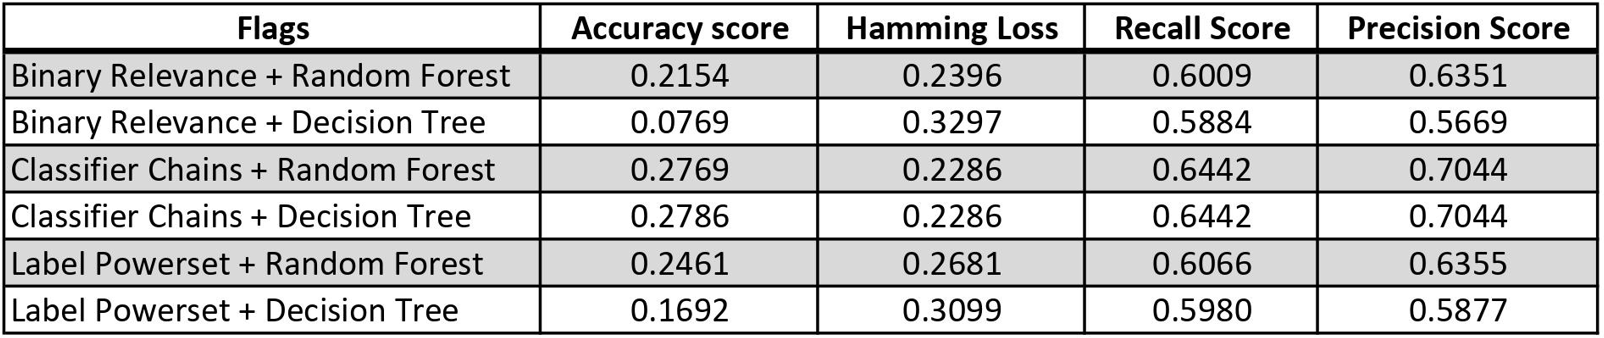

# **7. Birds Dataset**

## **Análise do Dataset**

É um conjunto de dados para prever o conjunto de espécies de aves que estão presentes, dado um clipe de áudio de dez segundos. Possui atributos, sendo 2 nominais e 258 numéricos e 19 rótulos para classificação.

In [160]:
data_birds, meta_birds = scipy.io.arff.loadarff('birds-train.arff')
df_birds = pd.DataFrame(data_birds)
X_birds_train = df_birds

In [161]:
data_birds_test, meta__birds_test = scipy.io.arff.loadarff('birds-test.arff')
df_birds_test = pd.DataFrame(data_birds_test)
X_birds_test = df_birds_test

In [162]:
df_birds.head()

,audio-ssd1,audio-ssd2,audio-ssd3,audio-ssd4,audio-ssd5,audio-ssd6,audio-ssd7,audio-ssd8,audio-ssd9,audio-ssd10,...,Hermit Warbler,Swainson\'s Thrush,Hammond\'s Flycatcher,Western Tanager,Black-headed Grosbeak,Golden Crowned Kinglet,Warbling Vireo,MacGillivray\'s Warbler,Stellar\'s Jay,Common Nighthawk
0,0.016521,0.039926,0.089632,0.134119,0.170470,0.176872,0.171546,0.182392,0.162482,0.159083,...,b'0',b'0',b'1',b'1',b'0',b'0',b'0',b'0',b'0',b'0'
1,0.006600,0.035984,0.089956,0.123214,0.172273,0.177068,0.165507,0.179655,0.161744,0.163678,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
2,0.006894,0.017722,0.048062,0.065802,0.103443,0.091397,0.084931,0.088666,0.075676,0.074408,...,b'0',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
3,0.031046,0.127675,0.221428,0.272707,0.358743,0.349389,0.316029,0.330656,0.310752,0.306288,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
4,0.064721,0.226644,0.304482,0.274662,0.346980,0.334063,0.307223,0.324666,0.297070,0.292258,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'


In [163]:
df_birds.replace([b'0', b'1'], [0, 1], inplace=True)


In [164]:
df_categories_birds = df_birds.iloc[:,-19:]
df_categories_birds.head()

,Brown Creeper,Pacific Wren,Pacific-slope Flycatcher,Red-breasted Nuthatch,Dark-eyed Junco,Olive-sided Flycatcher,Hermit Thrush,Chestnut-backed Chickadee,Varied Thrush,Hermit Warbler,Swainson\'s Thrush,Hammond\'s Flycatcher,Western Tanager,Black-headed Grosbeak,Golden Crowned Kinglet,Warbling Vireo,MacGillivray\'s Warbler,Stellar\'s Jay,Common Nighthawk
0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


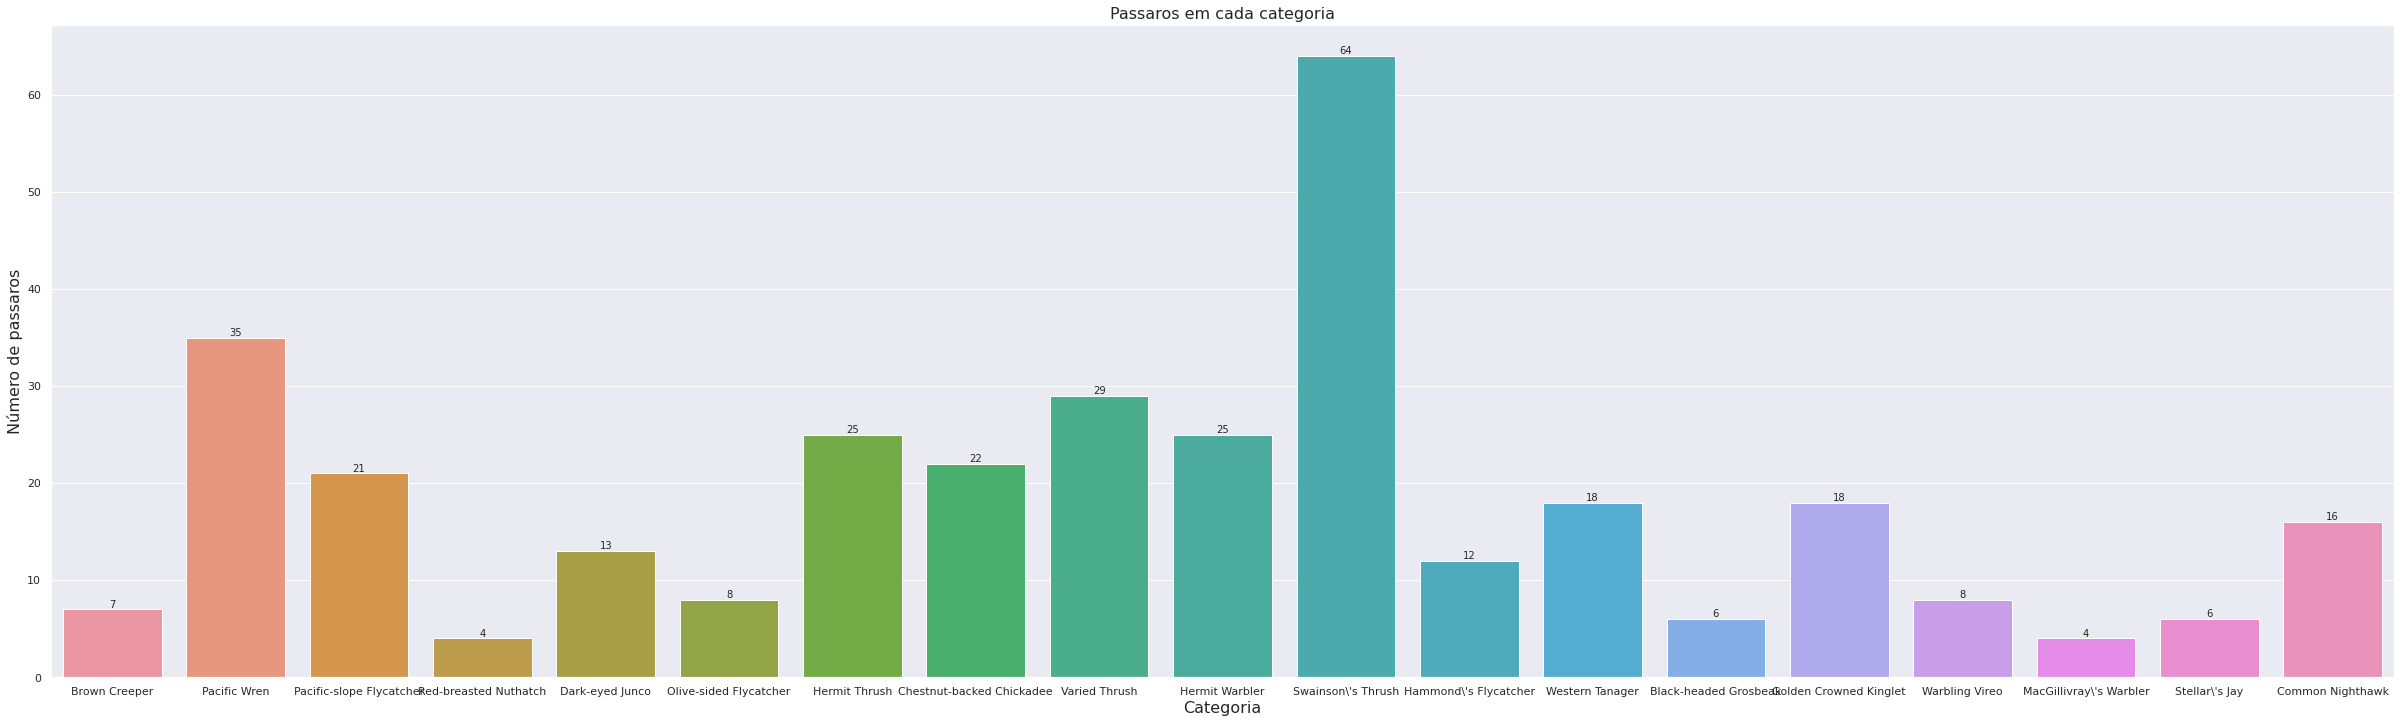

In [165]:
categories_birds = list(df_categories_birds.columns.values)
sns.set(font_scale = 1)
plt.figure(figsize=(42,12))
ax= sns.barplot(categories_birds, df_categories_birds.sum().values)
plt.title("Passaros em cada categoria", fontsize=16)
plt.ylabel('Número de passaros', fontsize=16)
plt.xlabel('Categoria', fontsize=16)
rects = ax.patches
labels = df_categories_birds.sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', fontsize=10)
plt.show()

In [166]:
labels_birds = list(df_categories_birds.columns.values)
labels_count_birds = df_categories_birds[labels_birds].sum().values
labels_count_birds


array([ 7, 35, 21,  4, 13,  8, 25, 22, 29, 25, 64, 12, 18,  6, 18,  8,  4,
        6, 16])

In [167]:
birds_count_types = df_categories_birds[labels_birds].sum(axis=1)
birds_count_types

0      2
1      0
2      1
3      0
4      0
      ..
317    0
318    1
319    1
320    4
321    2
Length: 322, dtype: int64

In [168]:
multilabel_counts_birds = (birds_count_types.value_counts())

indexes = [str(i) + ' label' for i in multilabel_counts_birds.index.sort_values()]

In [169]:
multilabel_counts_birds

0    143
1     82
2     50
3     33
4     11
5      2
6      1
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


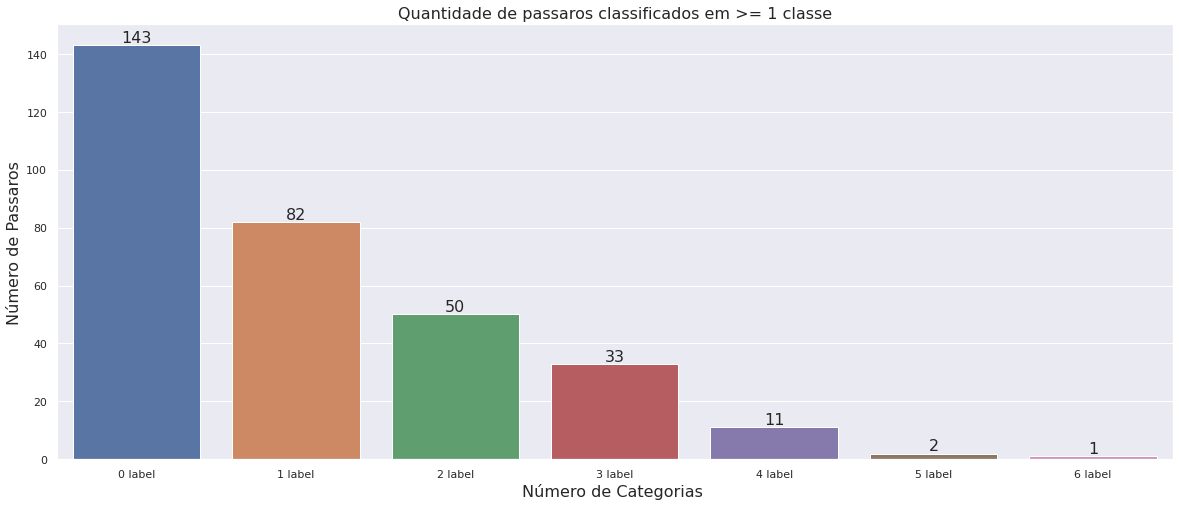

In [170]:
sns.set(font_scale = 1)
plt.figure(figsize=(20,8))
ax = sns.barplot(indexes, multilabel_counts_birds.values)
plt.title("Quantidade de passaros classificados em >= 1 classe", fontsize=16)
plt.ylabel('Número de Passaros', fontsize=16)
plt.xlabel('Número de Categorias ', fontsize=16)
rects = ax.patches
labels = multilabel_counts_birds
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', fontsize=16)
plt.show()

## **Treinamento**



In [171]:
for i in X_birds_train.columns:
    print('Coluna {}: treino {} / teste {}'.format(i, X_birds_train[i].unique(), X_birds_test[i].unique()))

A saída de streaming foi truncada nas últimas 5000 linhas.
 0.199476 0.211318 0.429823 0.437844 0.065376 0.019108 0.367751 0.375752
 0.219389 0.22224  0.123035 0.274344 0.452138 0.45283  0.063616 0.165426
 0.168024 0.300942 0.310393 0.034218 0.323571 0.136624 0.041516 0.011432
 0.009934 0.001066 0.005747 0.020742 0.00481  0.002335 0.00434  0.127369
 0.115798 0.279031 0.209745 0.091551 0.048246 0.041853 0.028061 0.020035
 0.0213   0.048324 0.065752 0.059157 0.033138 0.040953 0.052523 0.100756
 0.017392 0.014872 0.036356 0.070848 0.023693 0.014087 0.270488 0.057359
 0.046689 0.056862 0.013371 0.008286 0.010367 0.36615  0.380169 0.004994
 0.004281 0.008923 0.005676 0.002252 0.015399 0.055214 0.006763 0.005374
 0.003225 0.023376 0.012068 0.005263 0.037235 0.023724 0.019294 0.009918
 0.011639 0.249751 0.025542 0.022914 0.016257 0.019748 0.230873 0.025219
 0.201923 0.438146 0.025693 0.376367 0.360874 0.222103 0.252402 0.129523
 0.270376 0.28185  0.448215 0.457807 0.145394 0.057094 0.02814  0

Transformando os atributos nominais em valores inteiros e separando os rótulos utilizados para classificação

In [172]:
X_birds_train.replace([b'NO',b'YES',b'0',b'1',b'2',b'3',b'4',b'5',b'6',b'7',b'8',b'9',b'10',b'11',b'12',b'13',b'14',b'15',b'16',b'17'],[0,1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], inplace=True) 
X_birds_test.replace([b'NO',b'YES',b'0',b'1',b'2',b'3',b'4',b'5',b'6',b'7',b'8',b'9',b'10',b'11',b'12',b'13',b'14',b'15',b'16',b'17'],[0,1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], inplace=True) 

y_birds_train = X_birds_train.iloc[:,-19:]
X_birds_train.drop(columns=list(y_birds_train.columns), inplace=True)
#X_flags_train.drop(columns=['population'], inplace=True)

y_birds_test = X_birds_test.iloc[:,-19:]
X_birds_test.drop(columns=list(y_birds_test.columns), inplace=True)
#X_flags_test.drop(columns=['population'], inplace=True)

### **Binary Relevance**

In [173]:
br = BinaryRelevance(RandomForestClassifier())

br.fit(X_birds_train, y_birds_train)

pred_birds = br.predict(X_birds_test)


accuracy_score(y_birds_test, pred_birds)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

0.5170278637770898

In [174]:
hamming_loss(y_birds_test, pred_birds)


0.04269186899136386

In [175]:
recall_score(y_birds_test, pred_birds, average='macro')


0.10415666213495312

In [176]:
precision_score(y_birds_test, pred_birds, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.43958580662181773

In [177]:
br = BinaryRelevance(DecisionTreeClassifier())

br.fit(X_birds_train, y_birds_train)

pred_birdsdecision = br.predict(X_birds_test)


accuracy_score(y_birds_test, pred_birdsdecision)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

0.38390092879256965

In [178]:
hamming_loss(y_birds_test, pred_birdsdecision)


0.06338601922763565

In [179]:
recall_score(y_birds_test, pred_birdsdecision, average='macro')


0.32162054901486437

In [180]:
precision_score(y_birds_test, pred_birdsdecision, average='macro')

0.3205675251442351

### **Classifier Chain**

In [ ]:
cc = ClassifierChain(RandomForestClassifier())

cc.fit(X_birds_train, y_birds_train)

pred_birds3 = cc.predict(X_birds_test)


accuracy_score(y_birds_test, pred_birds3)

In [ ]:
hamming_loss(y_birds_test, pred_birds3)


In [ ]:
recall_score(y_birds_test, pred_birds3, average='macro')


In [ ]:
precision_score(y_birds_test, pred_birds3, average='macro')

In [ ]:
cc = ClassifierChain(DecisionTreeClassifier())

cc.fit(X_birds_train, y_birds_train)

pred_birdsdecision3 = cc.predict(X_birds_test)


accuracy_score(y_birds_test, pred_birdsdecision3)

In [ ]:
hamming_loss(y_birds_test, pred_birdsdecision3)


In [ ]:
recall_score(y_birds_test, pred_birdsdecision3, average='macro')


In [ ]:
precision_score(y_birds_test, pred_birdsdecision3, average='macro')

### **Label Powerset**

In [ ]:
lp = LabelPowerset(RandomForestClassifier())

lp.fit(X_birds_train, y_birds_train)

pred_birds4 = lp.predict(X_birds_test)


accuracy_score(y_birds_test, pred_birds4)

In [ ]:
hamming_loss(y_birds_test, pred_birds4)


In [ ]:
recall_score(y_birds_test, pred_birds4, average='macro')


In [ ]:
precision_score(y_birds_test, pred_birds4, average='macro')

In [ ]:
lp = LabelPowerset(DecisionTreeClassifier())

lp.fit(X_birds_train, y_birds_train)

pred_birdsdecision4 = lp.predict(X_birds_test)


accuracy_score(y_birds_test, pred_birdsdecision4)

In [ ]:
hamming_loss(y_birds_test, pred_birdsdecision4)


In [ ]:
recall_score(y_birds_test, pred_birdsdecision4, average='macro')


In [ ]:
precision_score(y_birds_test, pred_birdsdecision4, average='macro')

## **Resultados Finais**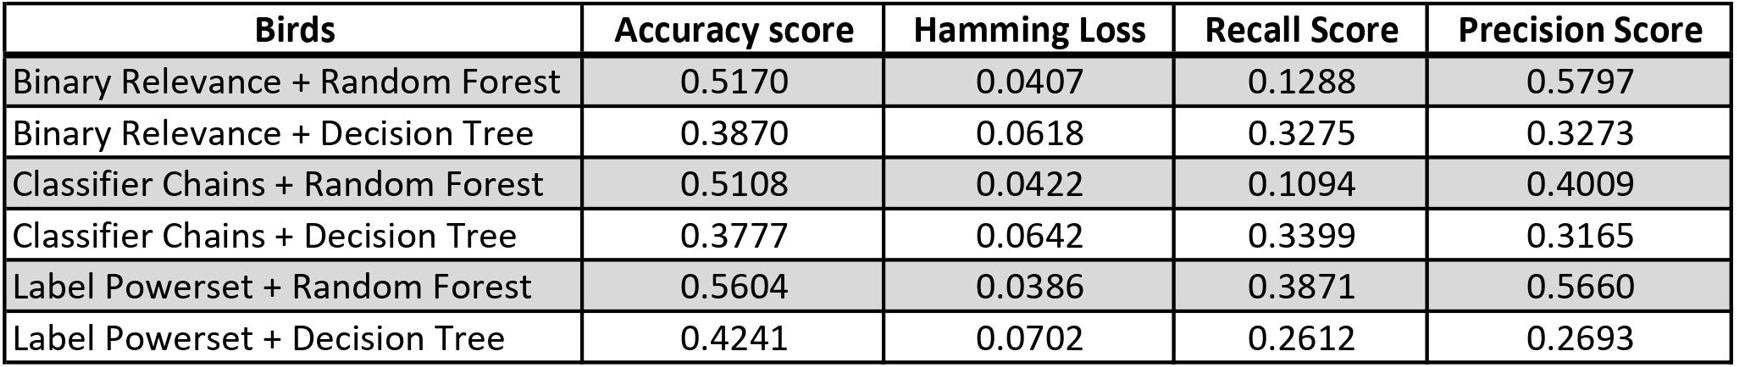